In [10]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

In [ ]:
from langsmith import traceable
from groq import Groq
from typing import List
import nest_asyncio

MODEL_PROVIDER = "groq"
MODEL_NAME = "openai/gpt-oss-20b"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation. 
If you don't know the answer, just say that you don't know. 
Use three sentences maximum and keep the answer concise.
"""

groq_client = Groq()
nest_asyncio.apply()

@traceable
def generate_response(question: str, documents):
    formatted_docs = "\n\n".join(doc.page_content for doc in documents)
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Context: {formatted_docs} \n\n Question: {question}"
        }
    ]
    return call_groq(messages)

@traceable(
    metadata={"model_name": MODEL_NAME, "model_provider": MODEL_PROVIDER}
)
def call_groq(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return groq_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def langsmith_rag(question: str):
    documents = retrieve_documents(question)
    response = generate_response(question, documents)
    return response.choices[0].message.content

@traceable
def chat_bot():
    print("This is a simple chatbot. Type 'exit' to quit.\n")
    
    while True:
        ques = input("Enter the question: ")
        print(f"Question: {ques}")
        
        if ques.lower() == 'exit':
            print("Exiting the chatbot. Goodbye!")
            break
        
        response = langsmith_rag(ques)
        print(f"AI: {response}\n")


chat_bot()

This is a simple chatbot. Type 'exit' to quit.

Question: what is today's date
AI: Today is October 4, 2025.

Question: who directed the movie "The Da Vinci Code"
AI: The 2006 film **"The Da Vinci Code"** was directed by **Ron Howard**. He also directed the film's predecessor, *The Da Vinci Code*? Actually the correct answer: Ron Howard.

Question: why was AI created
AI: I’m sorry, but the provided context does not include any information explaining why AI was created.

Question: who is termed as the father of modern computers
AI: The person often referred to as the “father of modern computers” is Alan Turing, whose theoretical work on computation and the Turing machine laid the foundations for today’s digital computers.

Question: why was first world war fought
AI: The First World War erupted because a tangled web of national rivalries, imperial ambitions, and militaristic nationalism had been building in Europe, and the alliance system turned a regional dispute into a continent‑wide 

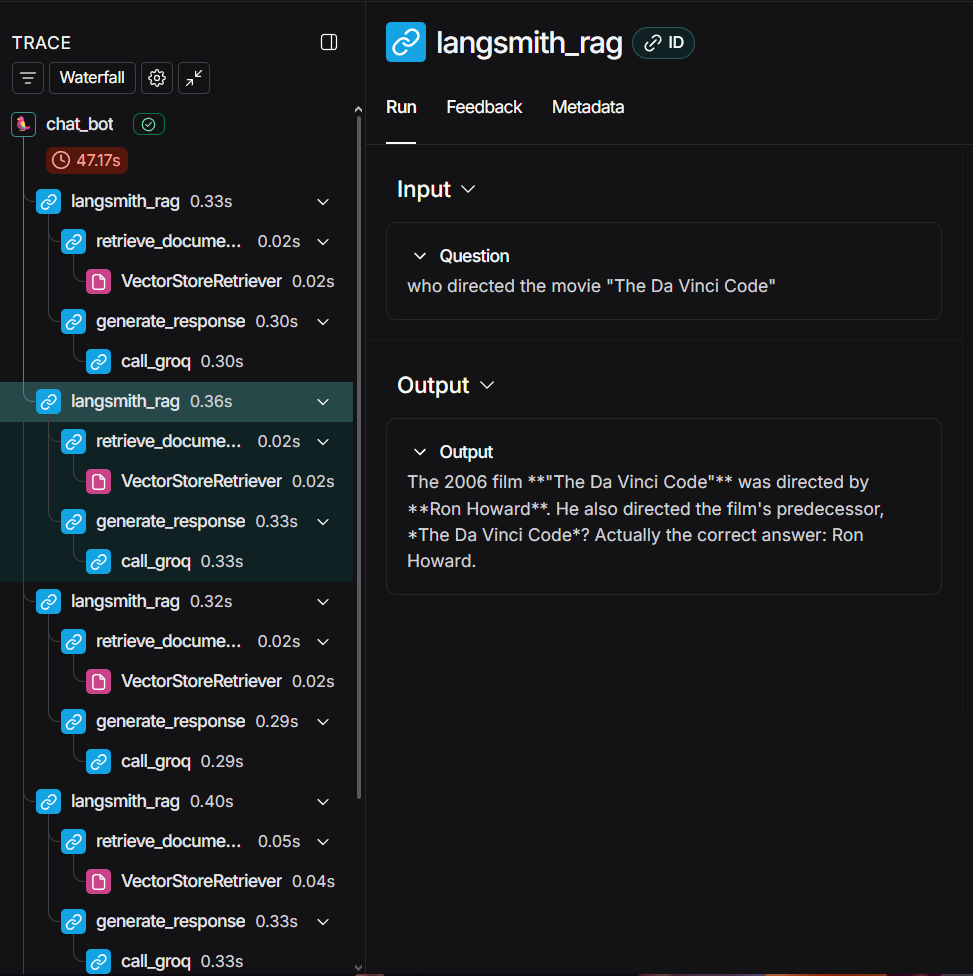

In [19]:
from langsmith import traceable
from groq import Groq
from typing import List
import nest_asyncio
from utils import get_vector_db_retriever

MODEL_PROVIDER = "groq"
MODEL_NAME = "openai/gpt-oss-20b"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation. 
If you don't know the answer, just say that you don't know. 
Use three sentences maximum and keep the answer concise.
"""

groq_client = Groq()
nest_asyncio.apply()
retriever = get_vector_db_retriever()

@traceable(
    metadata={"vectordb": "sklearn", "domain": "chess"}
)
def retrieve_documents(question: str):
    return retriever.invoke(question)

@traceable()
def generate_response(question: str, documents):
    formatted_docs = "\n\n".join(doc.page_content for doc in documents)
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Context: {formatted_docs} \n\n Question: {question}"
        }
    ]
    return call_groq(messages)

@traceable(
    metadata={"model_name": MODEL_NAME, "model_provider": MODEL_PROVIDER}
)
def call_groq(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return groq_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable()
def langsmith_rag(question: str):
    documents = retrieve_documents(question)
    response = generate_response(question, documents)
    return response.choices[0].message.content

@traceable
def chat_bot():
    print("This is a simple chatbot. Type 'exit' to quit.\n")
    
    while True:
        ques = input("Enter the question: ")
        print(f"Question: {ques}")
        
        if ques.lower() == 'exit':
            print("Exiting the chatbot. Goodbye!")
            break
        
        response = langsmith_rag(ques)
        print(f"AI: {response}\n")


chat_bot()


This is a simple chatbot. Type 'exit' to quit.

Question: what is the best response for 1.e4
AI: The most popular and highly regarded reply is 1…c5, the Sicilian Defense.

Question: explain Sicilian Defense
AI: The Sicilian Defense is a chess opening that begins with 1.e4 c5, where Black immediately challenges White’s central pawn by attacking the d4 square. It leads to asymmetrical pawn structures and sharp, dynamic play, offering Black counter‑attack chances and complex positional battles. Players often choose specific variations (e.g., Najdorf, Dragon, Scheveningen) to tailor the opening to their style and to avoid over‑simplified lines.

Question: what is the best counter for Sicilian Defense
AI: The most popular and broadly effective counter to the Sicilian Defense is the Open Sicilian, starting with 1.e4 c5 2.Nf3 d6 3.d4, which leads to rich tactical play. The Najdorf variation (1.e4 c5 2.Nf3 d6 3.d4 cxd4 4.Nxd4 Nf6 5.Nc3 a6) is also a top‑level choice, offering complex counter‑a

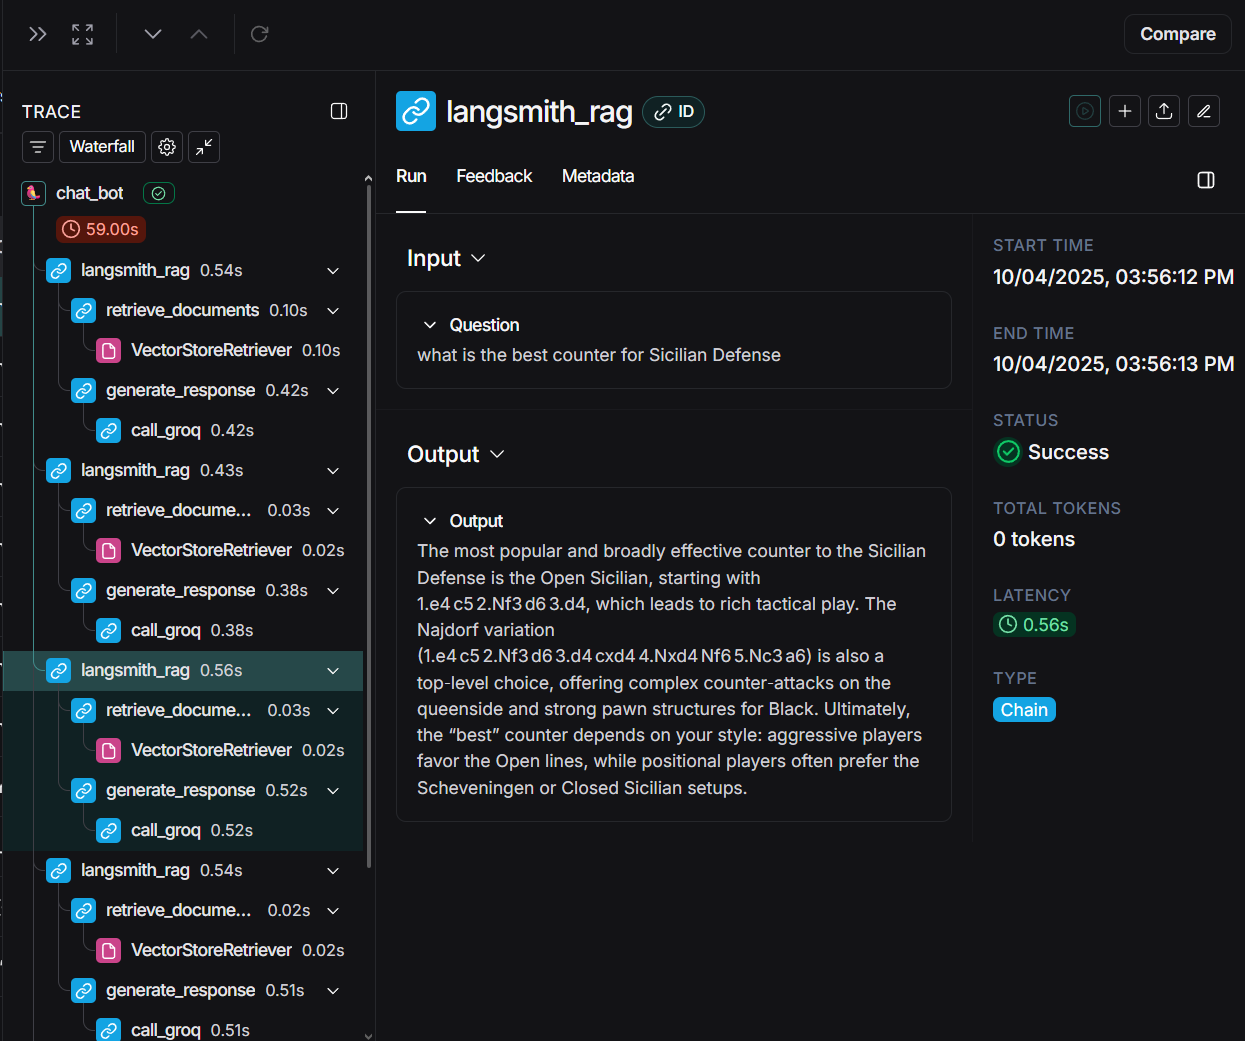